In [ ]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.
google-adk 1.13.0 requires websockets<16.0.0,>=15.0.1, but you have websockets 13.1 which is incompatible.


core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core   

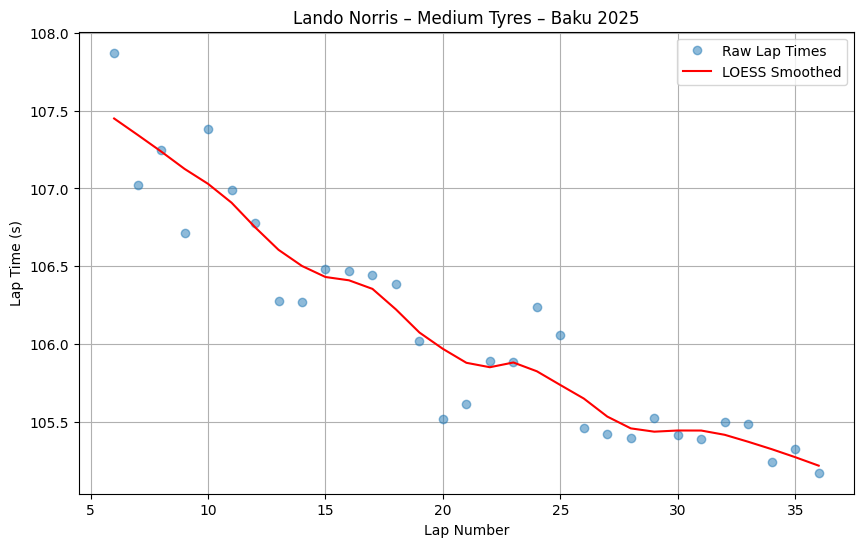

In [ ]:
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import os

# Enable Cache
if not os.path.exists('cache'):
    os.makedirs('cache')
fastf1.Cache.enable_cache('cache')

# Load session
session = fastf1.get_session(2025, 'Azerbaijan Grand Prix', 'R')
session.load()

laps = session.laps

# Norris' laps on Mediums (filtering accurate ones only)
nor_laps = laps[(laps['Driver'] == 'NOR') &
                (laps['Compound'] == 'MEDIUM') &
                (laps['LapTime'].notna()) &
                (laps['IsAccurate']) &
                (laps['PitInTime'].isna()) &
                (laps['PitOutTime'].isna())].copy()

# Convert lap times to seconds
nor_laps['LapTime_s'] = nor_laps['LapTime'].dt.total_seconds()

# Filter lap times within +/- 5s of median pace (remove slow laps)
median_pace = nor_laps['LapTime_s'].median()
nor_laps = nor_laps[(nor_laps['LapTime_s'] >= median_pace - 5) &
                    (nor_laps['LapTime_s'] <= median_pace + 5)]

# Raw lap numbers and lap times
X = nor_laps['LapNumber']
y = nor_laps['LapTime_s']

# Apply LOESS smoothing
smoothed = lowess(y, X, frac=0.3)

# Plot
plt.figure(figsize=(10,6))
plt.plot(X, y, 'o', alpha=0.5, label='Raw Lap Times')
plt.plot(smoothed[:,0], smoothed[:,1], '-', color='red', label='LOESS Smoothed')
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (s)")
plt.title("Lando Norris – Medium Tyres – Baku 2025")
plt.legend()
plt.grid(True)
plt.show()
